# JEST internal workshop &#8594; Intro to ML (Crash Course)

## A Data Science project

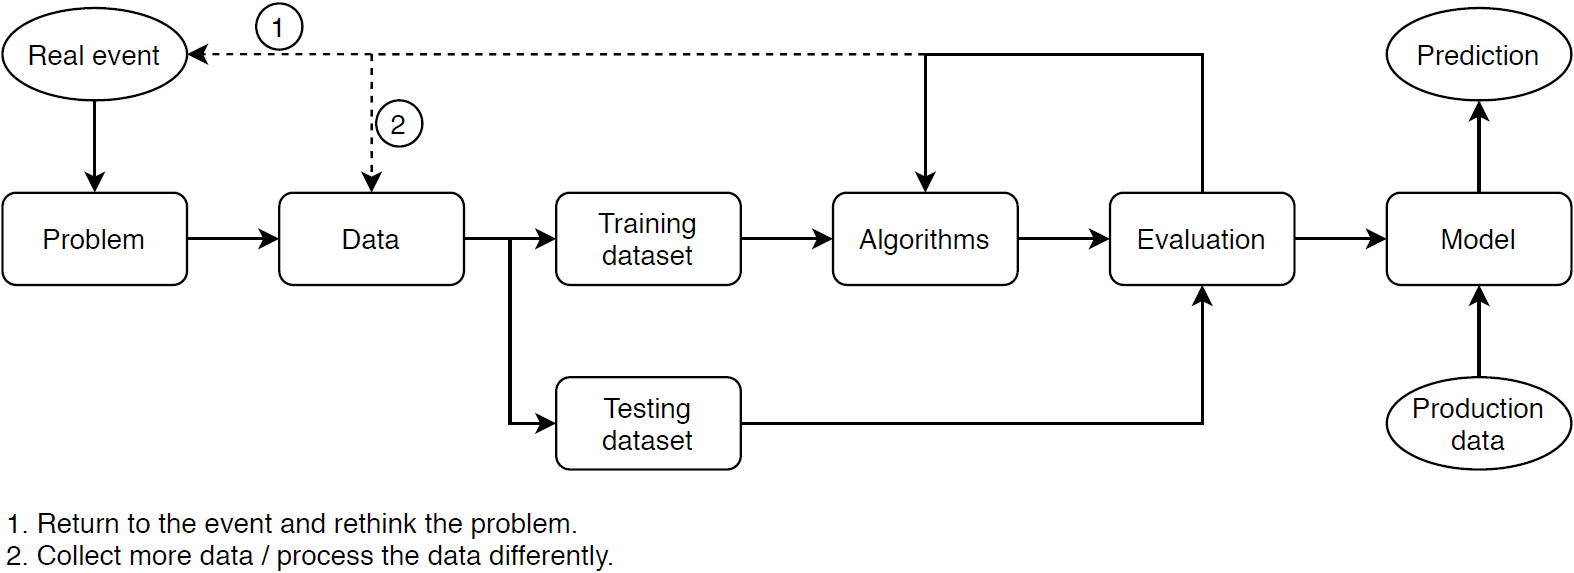

In [1]:
from IPython.display import Image
Image(filename='img/dataScienceProject.png')

by [Tamagusko](https://github.com/tamagusko/), Project Thesis: Artificial Intelligence Applied to Transport Infrastructure Management

## Machine Learning

### Can machines thinks?

"Machine Learning algorithms enable the computers to learn from data, and even improve themselves, without being explicitly programmed" (Arthur Samuel).

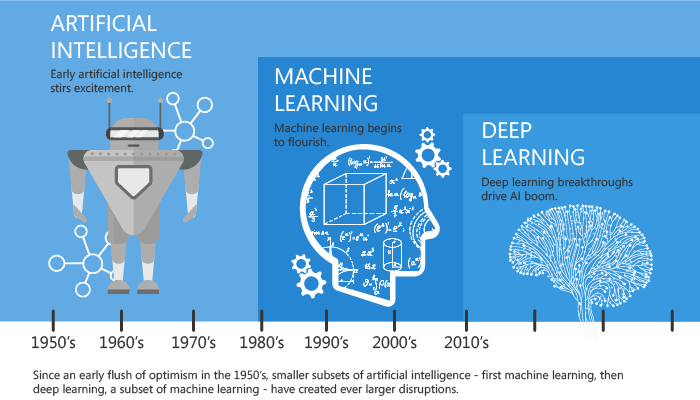

In [2]:
Image(filename='img/machineLearningEVO.png')

by Linkedin, Machine Learning vs Deep learning

---
### Machine Learning Methods

1. Supervised Learning (regression and classification)
2. Unsupervised (dimensionality reduction and clustering)
3. Reinforcement (learn from mistakes)

More details in [What are the types of machine learning?](https://towardsdatascience.com/what-are-the-types-of-machine-learning-e2b9e5d1756f)

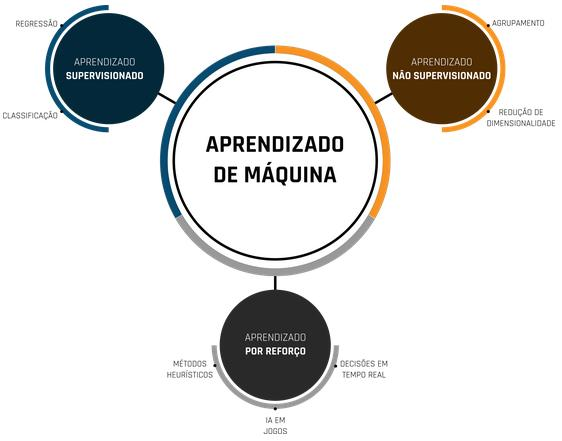

In [3]:
Image(filename='img/ml-ds-algos.jpg', width = 430)

By [Dataat](https://dataat.github.io/introducao-ao-machine-learning/introdu%C3%A7%C3%A3o.html#machine-learning).

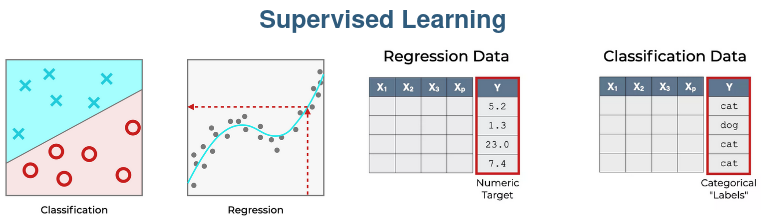

In [4]:
Image(filename='img/supervisedLearning.png')

By [Joshua Ebner, 2021](https://www.sharpsightlabs.com/blog/regression-vs-classification/)




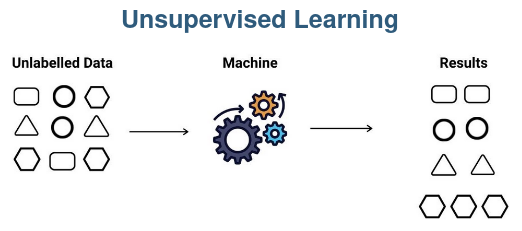

In [5]:
Image(filename='img/unsupervisedLearning.png')

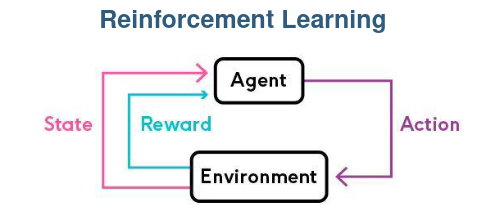

In [6]:
Image(filename='img/reinforcementLearning.png')

By [Vishnu Vijayan , 2020](https://medium.com/@vishnuvijayanpv/what-is-reinforcement-learning-e5dc827c8564)

## Which model should I choose?

[scikit-learn: Choosing the right estimator](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

##  Is my model good enough?

### Overfitting & Underfitting

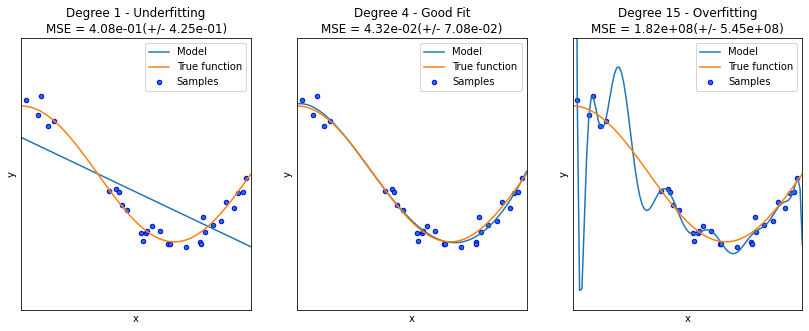

In [7]:
# Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]
status = ["Underfitting", "Good Fit", "Overfitting"]

gen_X = np.sort(np.random.rand(n_samples))
gen_y = true_fun(gen_X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(gen_X[:, np.newaxis], gen_y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, gen_X[:, np.newaxis], gen_y, scoring="neg_mean_squared_error", cv=10
)

    gen_X_test = np.linspace(0, 1, 100)
    plt.plot(gen_X_test, pipeline.predict(gen_X_test[:, np.newaxis]), label="Model")
    plt.plot(gen_X_test, true_fun(gen_X_test), label="True function")
    plt.scatter(gen_X, gen_y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(f"Degree {degrees[i]} - {status[i]}\nMSE = {-scores.mean():.2e}(+/- {scores.std():.2e})")
plt.show()

### Variance & Bias

\begin{equation}
Error (Model) = Variance + Bias² + Irreducible Error
\end{equation}

More details in: https://scott.fortmann-roe.com/docs/BiasVariance.html

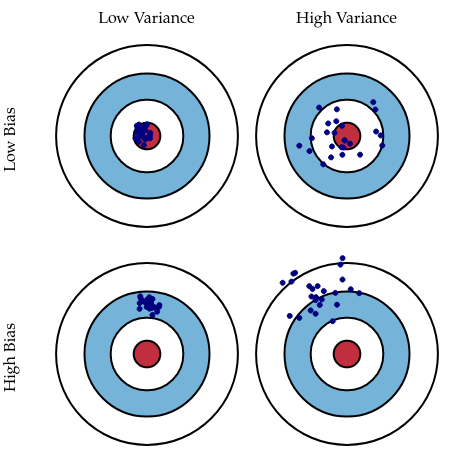

In [8]:
Image(filename='img/bias_variance.png', width=320)

Source: [Scott Fortmann-Roe, 2012](https://scott.fortmann-roe.com/docs/BiasVariance.html)

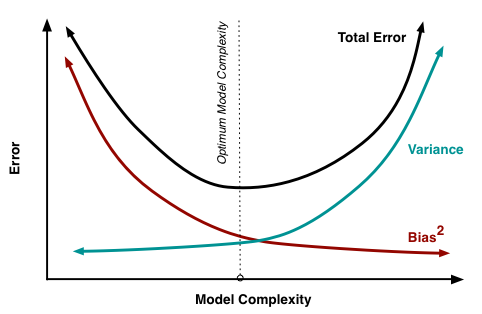

In [9]:
Image(filename='img/modelComplexity.png')

Source: [Scott Fortmann-Roe, 2012](https://scott.fortmann-roe.com/docs/BiasVariance.html)

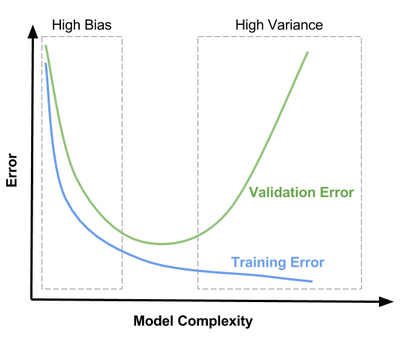

In [10]:
Image(filename='img/ModelComplexity2.png')

Source: [Satya Mallick, 2021](https://learnopencv.com/bias-variance-tradeoff-in-machine-learning/)


### Algorithms

#### Decision Tree

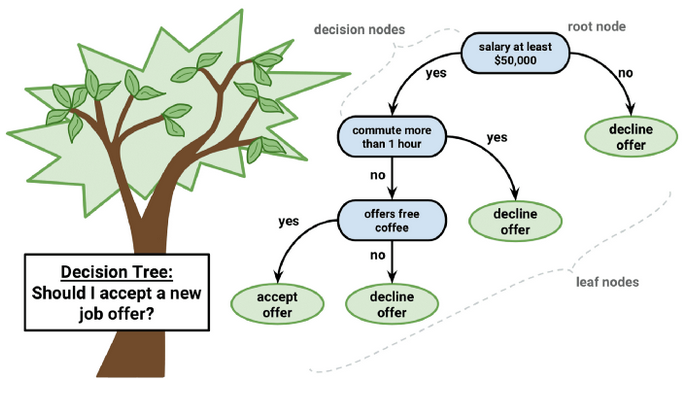

In [11]:
Image(filename='img/decisionTree.png')

By [synergy37AI](https://medium.com/@synergy37AI), in Medium:[Decision Trees: Lesson 101](https://medium.datadriveninvestor.com/decision-trees-lesson-101-f00dad6cba21).

Algorithm:

1. Check which feature provides the best cut
2. Create a node containing this feature
3. Repeat the same for the subsets until they all give a result

#### Random Forest

Note: bootstrapping, bagging, feature randomness, low correlation

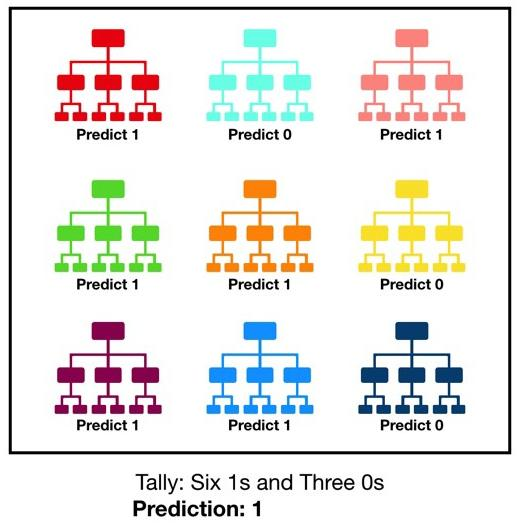

In [12]:
Image(filename='img/randomForest.jpg')

By [Tony Yiu](https://tonester524.medium.com/), in Medium:[Understanding Random Forest](https://towardsdatascience.com/understanding-random-forest-58381e0602d2).



Algorithm:

1. In Random forest n number of random records are taken from the data set having k number of records.
2. Individual decision trees are constructed for each sample.
3. Each decision tree will generate an output.
4. Final output is considered based on voting (classification) or averaging (regression).

#### K Nearest Neighbors (KNN)

Note: Small K can generate overfitting (learns from noise), large K can generate underfitting (neighbors too far away).

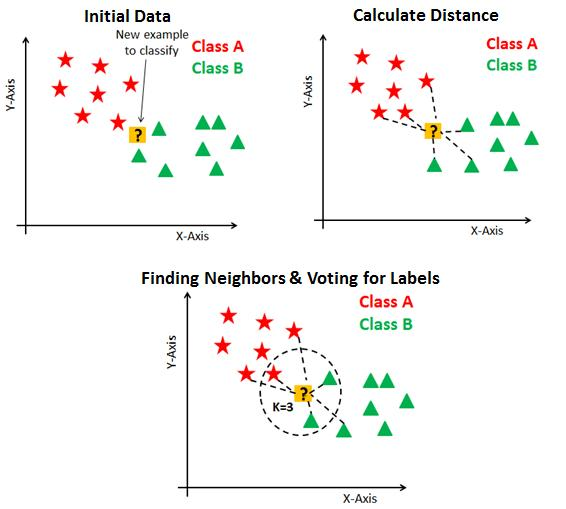

In [13]:
Image(filename='img/knn.jpg')

####  Extreme Gradient Boosting (XGBoost)

Note: Decision-tree-based ensemble based on gradient boosting. One of the best algorithms for structured data.

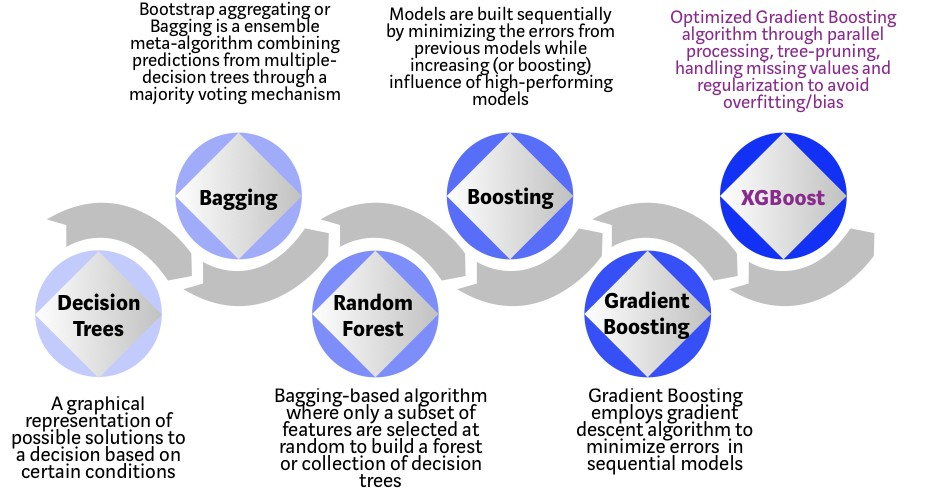

In [14]:
Image(filename='img/xgboost.jpg')

#### Multi-Layer Perceptron (MLP)

Note: Small K can generate overfitting (learns from noise), large K can generate underfitting (neighbors too far away).

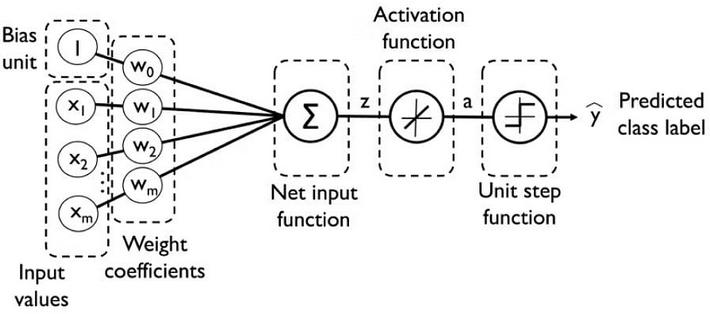

In [15]:
Image(filename='img/adalinerule.jpg')

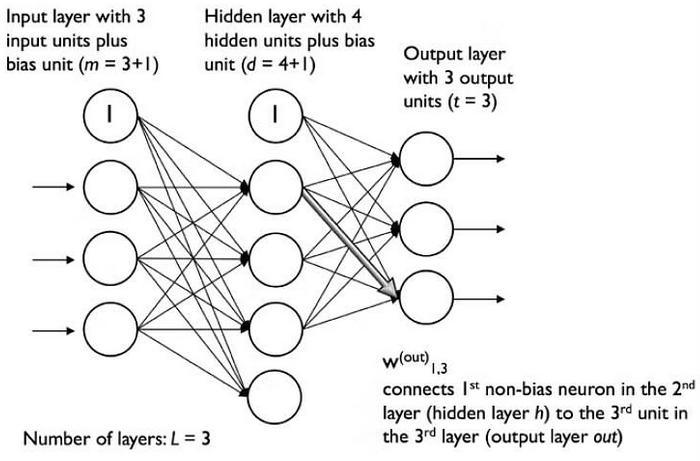

In [16]:
Image(filename='img/mlp.jpg')

Algorithm:

1. Starting with the input layer, propagate data forward to the output layer. This step is the forward propagation.
2. Based on the output, calculate the error (the difference between the predicted and known outcome). The error needs to be minimized.
3. Backpropagate the error. Find its derivative with respect to each weight in the network, and update the model.
4. Repeat the three steps given above over multiple epochs to learn ideal weights.
5. Finally, the output is taken via a threshold function to obtain the predicted class labels.

http://playground.tensorflow.org/